## Read and Understand the data

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#read the data
bike = pd.read_csv(r'E:\Data Science\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Dropping the Unnecessary columns
bike = bike.drop(['instant','dteday','atemp','casual','registered'], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [7]:
#Converting the Weathersit column to string

bike['weathersit'] = bike['weathersit'].apply(str)

In [8]:
#Converting the Season column to string

bike['season'] = bike['season'].apply(str)

In [9]:
#Converting the Month column to string

bike['mnth'] = bike['mnth'].apply(str)

In [10]:
#Converting the weekday column to string

bike['weekday'] = bike['weekday'].apply(str)

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [12]:
# Converting the Numerical values in Season to Names

bike.loc[bike['season']=='1','season']='Spring'
bike.loc[bike['season']=='2','season']='Summer'
bike.loc[bike['season']=='3','season']='Fall'
bike.loc[bike['season']=='4','season']='Winter'
bike.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [13]:
#Converting the values in Weathersit to names
bike.loc[bike['weathersit']=='1','weathersit']='Good'
bike.loc[bike['weathersit']=='2','weathersit']='Average'
bike.loc[bike['weathersit']=='3','weathersit']='Bad'

bike.weathersit.value_counts()

Good       463
Average    246
Bad         21
Name: weathersit, dtype: int64

In [14]:
# Converting the numerical value in mnth to names

bike.loc[bike['mnth']=='1','mnth']='Jan'
bike.loc[bike['mnth']=='2','mnth']='Feb'
bike.loc[bike['mnth']=='3','mnth']='Mar'
bike.loc[bike['mnth']=='4','mnth']='Apr'
bike.loc[bike['mnth']=='5','mnth']='May'
bike.loc[bike['mnth']=='6','mnth']='June'
bike.loc[bike['mnth']=='7','mnth']='July'
bike.loc[bike['mnth']=='8','mnth']='Aug'
bike.loc[bike['mnth']=='9','mnth']='Sep'
bike.loc[bike['mnth']=='10','mnth']='Oct'
bike.loc[bike['mnth']=='11','mnth']='Nov'
bike.loc[bike['mnth']=='12','mnth']='Dec'
bike.mnth.value_counts()

Aug     62
May     62
Oct     62
Mar     62
Jan     62
July    62
Dec     62
June    60
Apr     60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [15]:
# Converting the numerical values in weekday column to names

bike.loc[bike['weekday']=='0','weekday']='Sun'
bike.loc[bike['weekday']=='1','weekday']='Mon'
bike.loc[bike['weekday']=='2','weekday']='Tue'
bike.loc[bike['weekday']=='3','weekday']='Wed'
bike.loc[bike['weekday']=='4','weekday']='Thu'
bike.loc[bike['weekday']=='5','weekday']='Fri'
bike.loc[bike['weekday']=='6','weekday']='Sat'
bike.weekday.value_counts()


Mon    105
Sat    105
Sun    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Average,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Average,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,43.6957,12.522300,1600


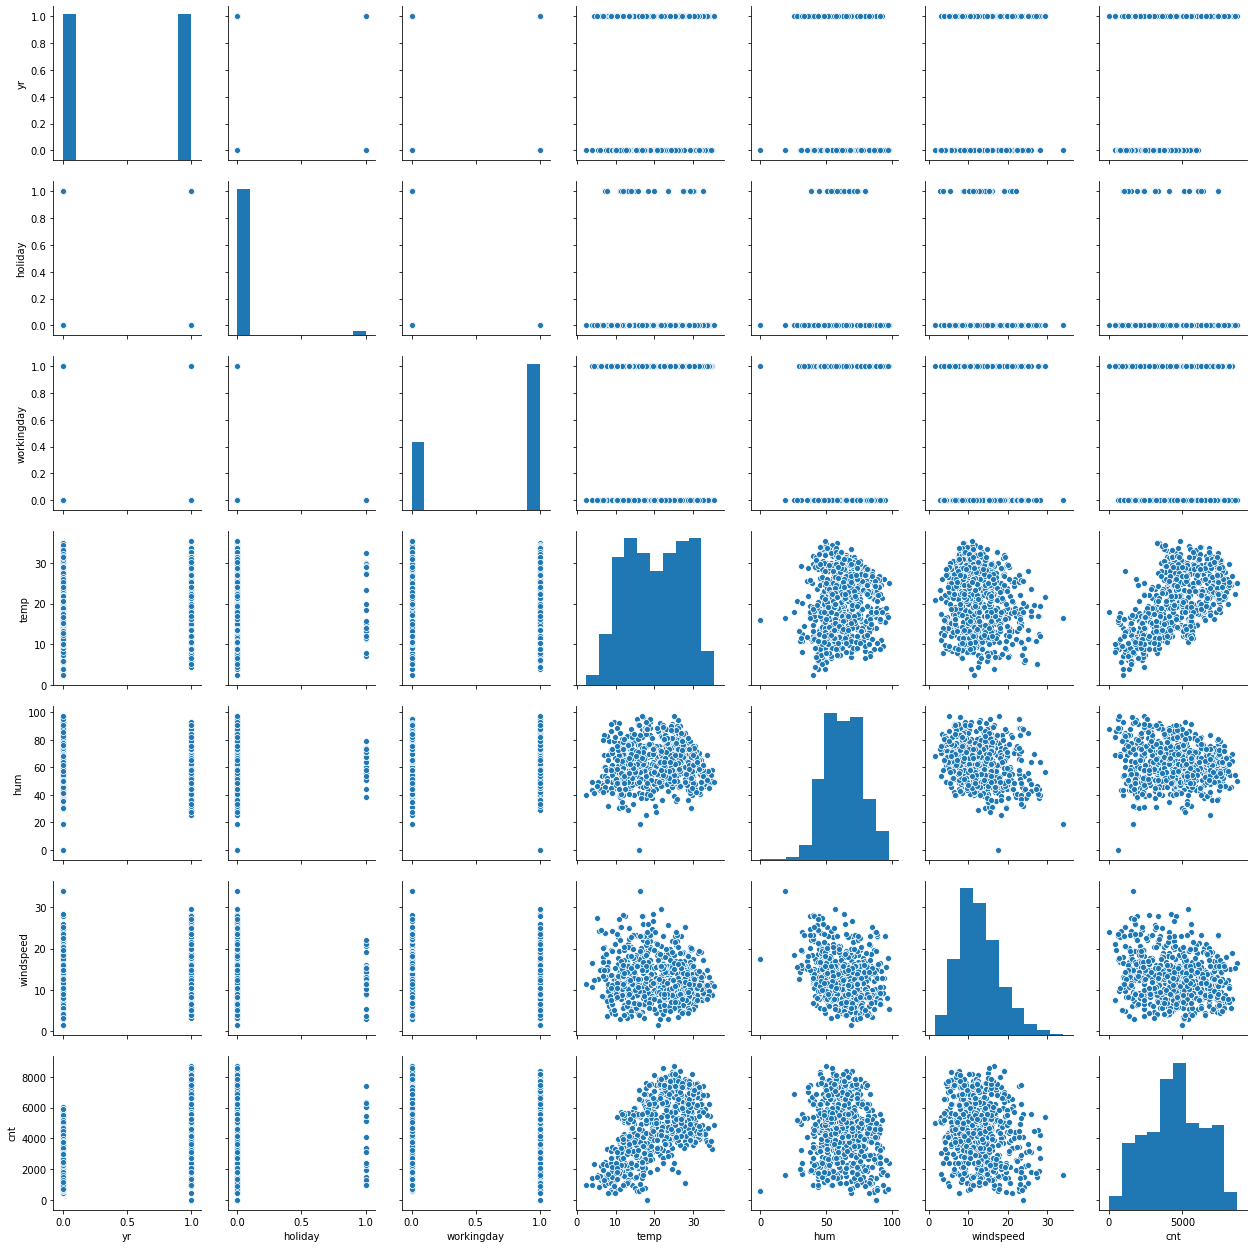

In [17]:
#visualising the numeric data

sns.pairplot(bike)

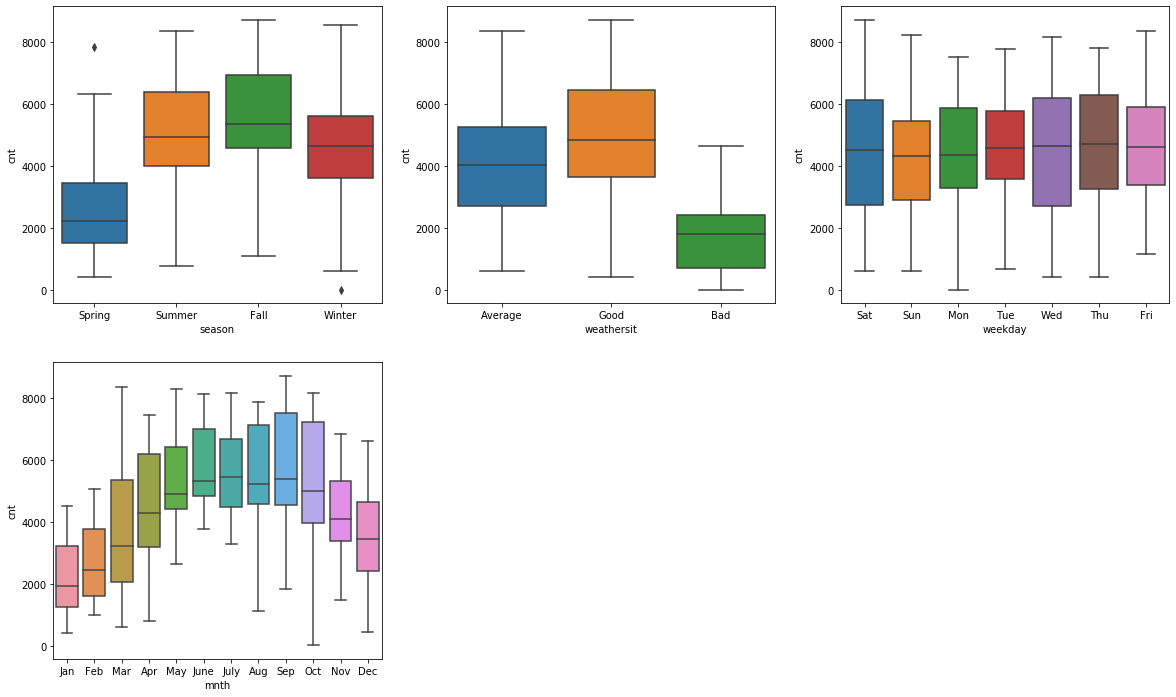

In [18]:
#Visualising the categorical data

plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data = bike)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit',y='cnt',data = bike)

plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data = bike)

plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt',data = bike)

### Creating Dummy Variables

In [19]:
# Creating Dummy Variables for Weathersit

Weather = pd.get_dummies(bike['weathersit'],drop_first=True)
Weather

,Bad,Good
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
725,0,0
726,0,0
727,0,0
728,0,1


In [20]:
#Creating Dummy variables for Season

Season = pd.get_dummies(bike['season'],drop_first=True)
Season

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [21]:
# Creating dummy variables for weekday
Weekday = pd.get_dummies(bike['weekday'],drop_first = True)
Weekday

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [22]:
# Creating dummy variables for mnth

Month = pd.get_dummies(bike['mnth'], drop_first = True)
Month

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


#### Concatenating the dataframes

In [23]:
# Concatenating the Season dataframe

bike = pd.concat([bike,Season,Weather,Month,Weekday],axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,Spring,0,Jan,0,Sat,0,Average,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Average,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,Jan,0,Mon,1,Good,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Good,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,Wed,1,Good,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#Dropping the unnecessary Columns
vars = ['season','weathersit','mnth','weekday']
bike  =bike.drop(vars,axis = 1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting into train and test data

In [25]:
df_train, df_test= train_test_split(bike,train_size = 0.7, random_state = 100)

In [26]:
df_train.shape

(510, 29)

In [27]:
df_test.shape

(220, 29)

### Rescaling the features

In [28]:
#MinMax Scaling
scaler = MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

(29.0, 0.0)

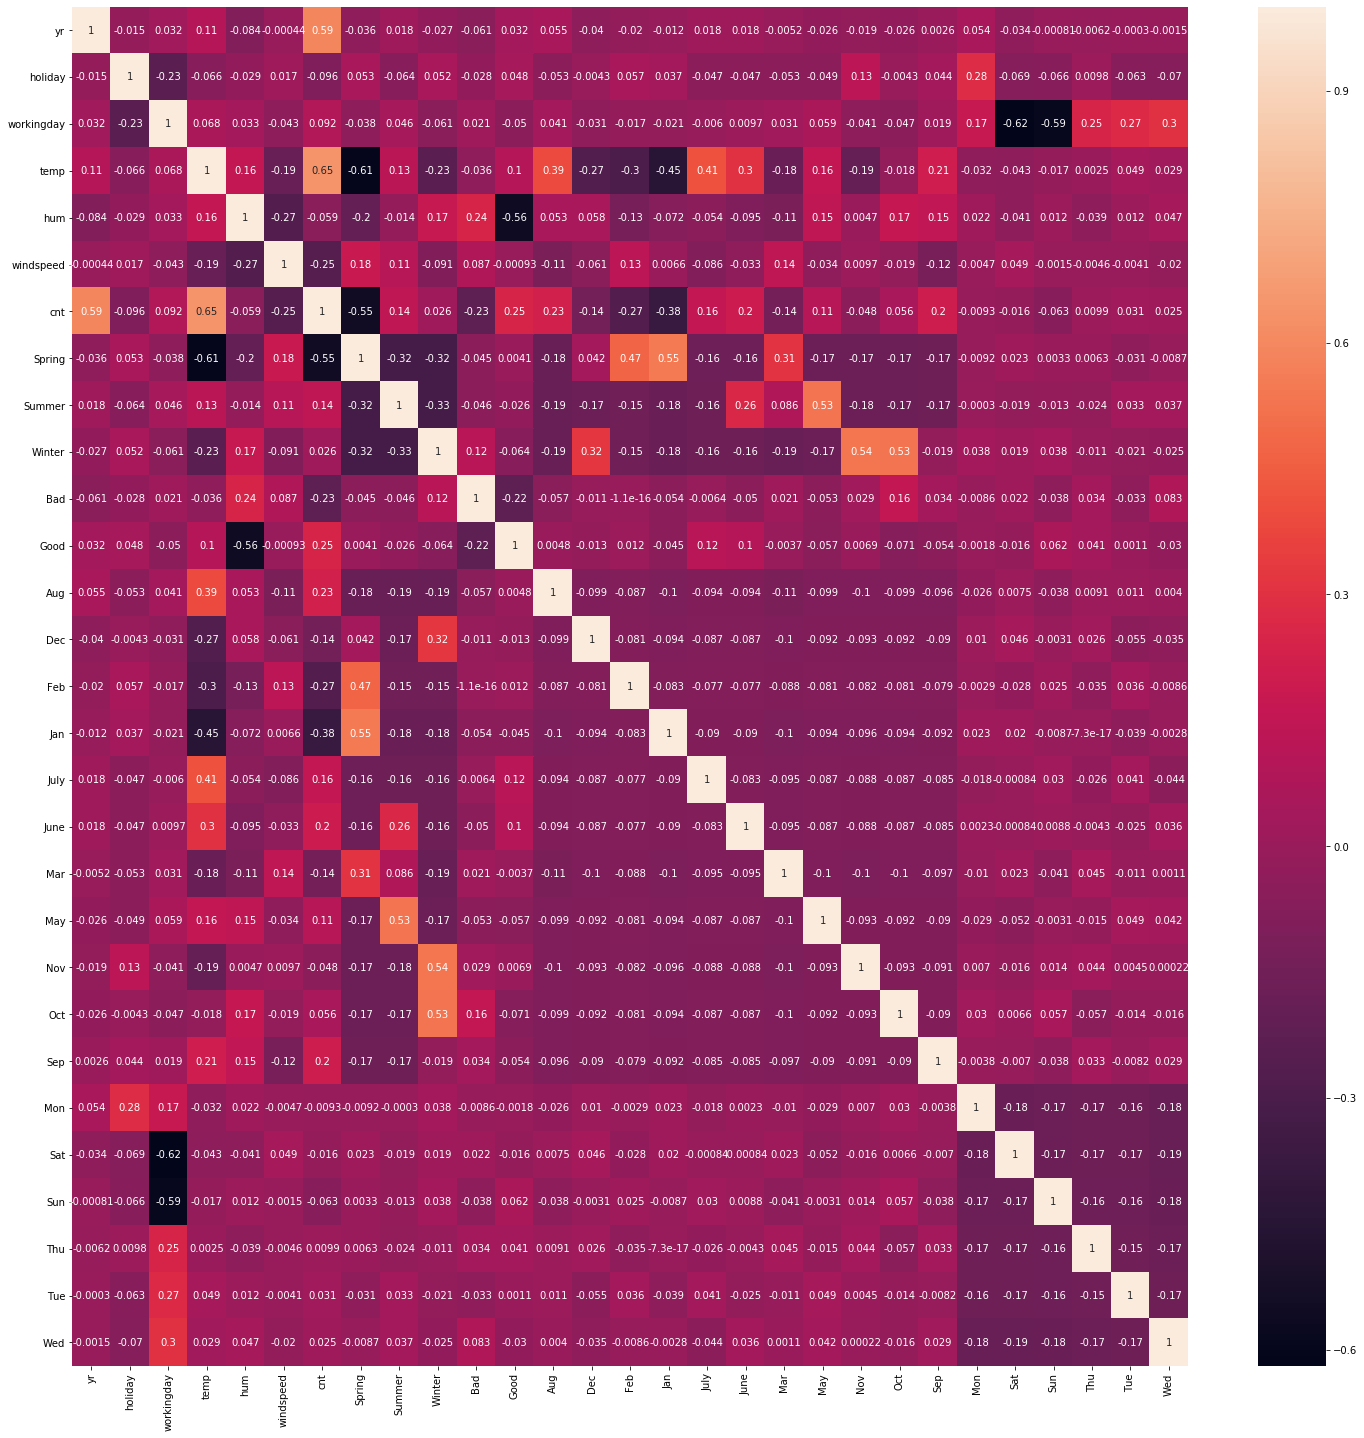

In [29]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(), annot= True, ax = ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Dividing into X_train and y_train

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Bad,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Building the Model

In [33]:
# Choosing the variables using RFE

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [34]:
# Listing the variables with their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Bad', True, 1),
 ('Good', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11)]

In [35]:
#Listing the chosen variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Bad', 'Good', 'Jan', 'July', 'Sep', 'Sat'],
      dtype='object')

In [36]:
# add a contant
X_train_RFE=X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)

# create first model
lm = sm.OLS(y_train,X_train_RFE)

#fit the model
lr_model = lm.fit()

#show the result
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          4.22e-191
Time:                        12:37:31   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.040      4.932      0.0

##### The R2 squared comes as 0.848 and the adjusted R2 squared as 0.844. We drop the Jan variable as it has the highest p value among all the variables, and see its effect

In [37]:
# Removing the variables with high p value
X = X_train_RFE.drop('Jan', axis = 1)

In [38]:
#Rebuilding the model

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          2.11e-191
Time:                        12:37:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1838      0.039      4.674      0.0

#### The R2 squared comes as 0.847 and the adjusted R2 squared as 0.843. 

### Calculating the VIF

In [39]:
# dropping the const variable

X = X.drop(['const'],axis  =1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Bad', 'Good', 'July', 'Sep', 'Sat'],
      dtype='object')

In [40]:
# Calculating the VIF

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,hum,23.60
3,temp,19.43
2,workingday,5.30
6,Spring,4.81
5,windspeed,4.70
8,Winter,3.76
10,Good,3.43
7,Summer,2.98
0,yr,2.08
13,Sat,1.97


#### We see humidity and temperature have a high VIF. So we drop hum and rebuild the model

In [41]:
X = X.drop(['hum'],axis  =1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Bad', 'Good', 'July', 'Sep', 'Sat'],
      dtype='object')

In [42]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.28e-188
Time:                        12:38:22   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0754      0.031      2.450      0.0

In [43]:
#calculating the VIF
vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,temp,7.75
2,workingday,5.15
4,windspeed,4.68
9,Good,2.84
5,Spring,2.57
6,Summer,2.32
0,yr,2.07
7,Winter,1.99
12,Sat,1.95
10,July,1.59


#### We see that the temp also has relatively high VIF but also a high co relation with the target variable (0.65).Also, on dropping that variable, the R2 squared comes down to 0.76. Henve, we retain the variable.

### Residual Analysis

In [44]:
y_train_pred = lr_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

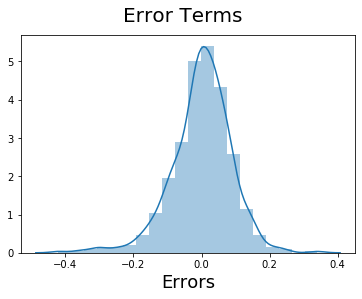

In [46]:
# Plotting the histogram

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### Evaluation on Test Set


In [47]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Bad', 'Good', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

In [51]:
# Creating new test dataframe by dropping the columns
X_test_new = X_test[X.columns]
X_test_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Bad', 'Good', 'July', 'Sep', 'Sat'],
      dtype='object')

#### Model Prediction

In [52]:
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,workingday,temp,windspeed,Spring,Summer,Winter,Bad,Good,July,Sep,Sat
184,1.0,0,1,0,0.831783,0.084219,0,0,0,0,0,1,0,0
535,1.0,1,0,1,0.901354,0.153728,0,1,0,0,1,0,0,0
299,1.0,0,0,1,0.511964,0.334206,0,0,1,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.339570,0,0,0,0,1,0,0,0
152,1.0,0,0,1,0.817246,0.537414,0,1,0,0,1,0,0,0


In [54]:
y_pred= lr_model.predict(X_test_new)

In [56]:
r2_score(y_true= y_test,y_pred = y_pred)

0.8081836108549538

### The R2 squared for test data coes as 0.808 which is in the range of the R2 squared for train data. Hence, the model is successful.

Text(0, 0.5, 'y_pred')

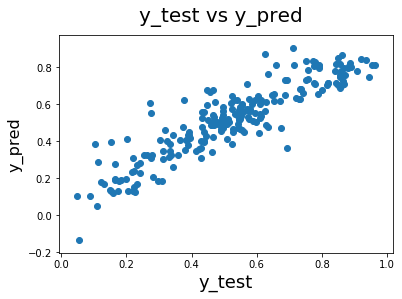

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          